In [249]:
import numpy as np
import random
import matplotlib.pyplot as plt

# (iii) and (iv) - m function, uses the built-in numpy.matrix.sum method
def m(voters, L):
    return (1 / L ** 2) * voters.sum()

# (v) - this function generates the initial voters for m(t = 0) = 0.7
def rand_initial(voters, L):
    # iterates through the matrices voters to define each one
    for i in range(L):
        for j in range(L):
            r = random.uniform(0.0, 1.0)
            if r < 0.15:
                voters[i][j] = -1
            else:
                voters[i][j] = 1
    return voters

# (vi) performs the random draws
def vi():
    return random.uniform(0.0, 1.0)

# (vii) - performs the dynamics of the model
def vii(voters, L):
    # creates a new voters array to avoid checks of corners
    new_voters = voters
    new_voters = np.insert(new_voters, 0, voters[len(voters)-1], axis=0)
    new_voters = np.insert(new_voters, len(new_voters), voters[0], axis=0)
    new_voters = np.insert(new_voters, 0, np.squeeze(new_voters[:, len(new_voters)-3]), axis=1)
    new_voters = np.insert(new_voters, len(new_voters)-1, np.squeeze(new_voters[:, 1]), axis=1)

    i = random.randint(0, L - 1)
    j = random.randint(0, L - 1)
    r = vi()
    if r <= 0.25:
        voters[i][j] = new_voters[i][j-1]
    elif r > 0.25 and r <= 0.50:
        voters[i][j] = new_voters[i][j+1]
    elif r > 0.50 and r <= 0.75:
        voters[i][j] = new_voters[i+1][j]
    elif r > 0.75 and r <= 1:
        voters[i][j] = new_voters[i-1][j]
    return voters

# (viii) - function which iterates through the time and also returns m_values
def viii(voters, T, L):
    m_values = []
    # iterates through the time
    for i in range(T):
        voters = vii(voters, L)
        m_value = m(voters, L) # (ix)
        m_values.append(m_value)

    return m_values

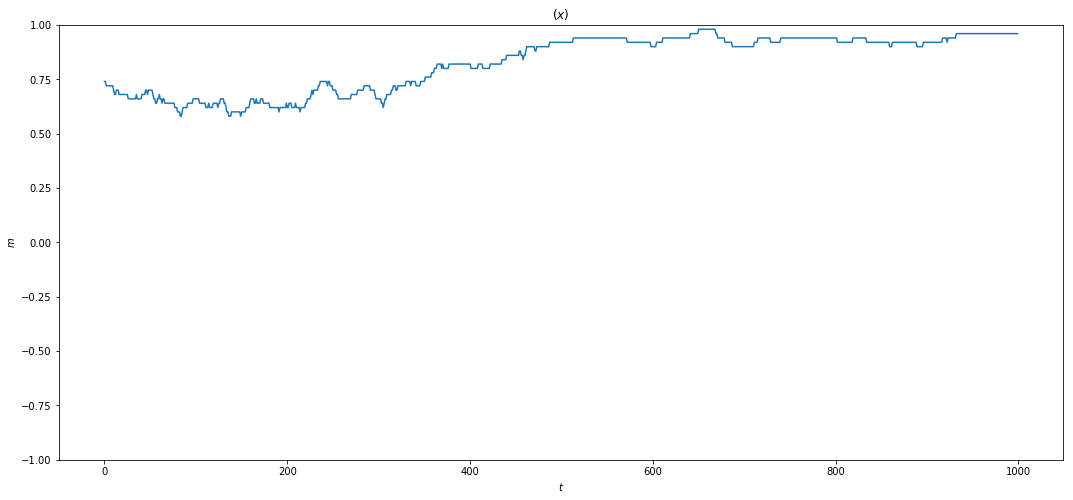

In [256]:
# (i) and (ii)
T, L = 1000, 10
voters, m_values, t_values, m_means =  np.zeros((L, L)), [], np.arange(T), np.zeros(T)
voters = rand_initial(voters, L)

# (x)
m_values = viii(voters, T, L)

# function to make it easy to plot all the graphs
def plot_fun(x, y, label_x, label_y, title):
    plt.rcParams['figure.figsize'] = [18, 8]
    plt.plot(x, y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.ylim(-1, 1)
    plt.title(title)
    
plot_fun(t_values, m_values, '$t$', '$m$', '$(x)$')
plt.show()

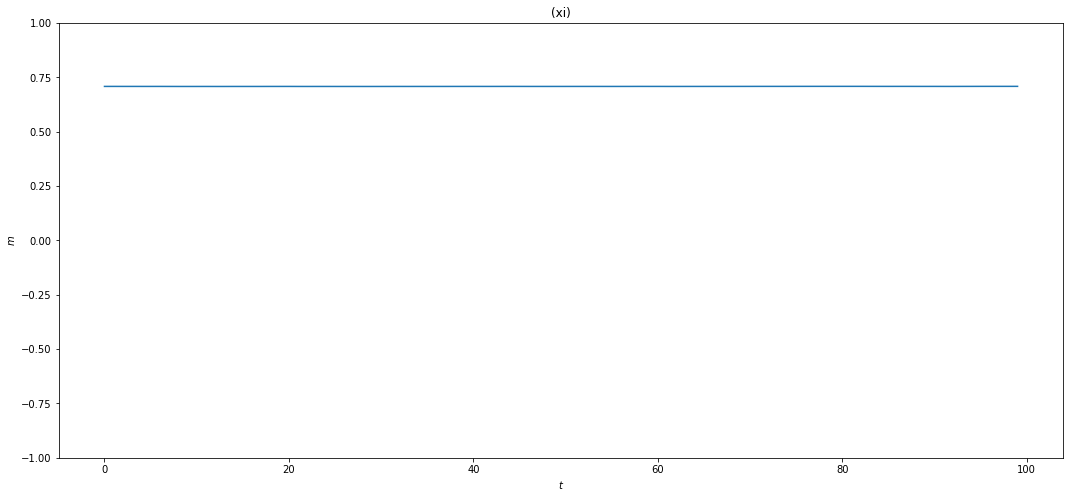

In [254]:
L, T, R = 100, 100, 5
voters, m_values, t_values, m_means =  np.zeros((L, L)), [], np.arange(T), np.zeros(T)
voters = rand_initial(voters, L)

# (xi) - this function performs R realizations of the dynamics and get the mean value
def xi(R, T, L, voters, m_means):
    # iterates through the R realizations
    for i in range(R):
        m_values = viii(voters, T, L)
        m_means += m_values
    return m_means/R

m_means = xi(R, T, L, voters, m_means)

plot_fun(t_values, m_means, '$t$', '$m$', '(xi)')

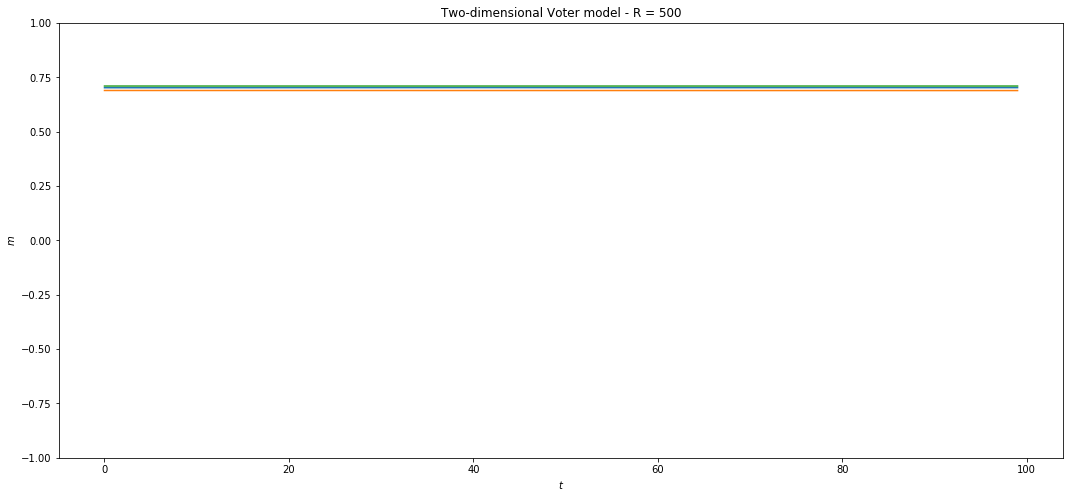

In [257]:
# function to make it easy to run all the realizations
def run(L, T, R, title):
    voters, m_values, t_values, m_means =  np.zeros((L, L)), [], np.arange(T), np.zeros(T)
    voters = rand_initial(voters, L)
    
    m_means = xi(R, T, L, voters, m_means)
    plot_fun(t_values, m_means, '$t$', '$m$', title)
    
L, T, R = 100, 100, 5
run(L, T, R, 'Two-dimensional Voter model - R = 5')

L, T, R = 100, 100, 50
run(L, T, R, 'Two-dimensional Voter model - R = 50')

L, T, R = 100, 100, 500
run(L, T, R, 'Two-dimensional Voter model - R = 500')

plt.show()